# WeatherPy

---

## Data Analyst

Vidal Garcia Martinez

## Analysis Report

- The correlation between latitude and max temperature is highly notorious for northern and southern hemispheres. 

- The farther the city is from the equator, the max temperature goes down linearly.

- There is no clear correlation between cloudiness & latitude for either hemisphere

- There is no clear correlation between humidity & latitude for either hemisphere

- There is no clear correlation between wind speed & latitude for either hemisphere. However, wind speeds are similarly consistent when the cities are closer to the equator.

- Temperature rises as cities get closer to the equator

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime
from dateutil import tz

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1

### - Create Plots to Showcase the Relationship Between Weather Variables and Latitude

###  - Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city.replace(" ","&")
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        response = requests.get(city_url).json()
        
        # Parse the JSON and retrieve data
        city_weather = response['main']['temp']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng =  response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']
        
        # Convert UTC to Local TZ
        city_date = datetime.fromtimestamp(int(city_date)).strftime("%m/%d/%Y %H:%M:%S")
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | verkhoyansk
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | hastings
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | vanimo
Processing Record 18 of Set 1 | namibe
Processing Record 19 of Set 1 | alice springs
Processing Record 20 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 21 of Set 1 | flinders
Processing R

Processing Record 33 of Set 4 | marystown
Processing Record 34 of Set 4 | tomatlan
Processing Record 35 of Set 4 | luba
Processing Record 36 of Set 4 | mahajanga
Processing Record 37 of Set 4 | fortuna
Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | praya
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | impfondo
Processing Record 42 of Set 4 | guerrero negro
Processing Record 43 of Set 4 | nova olinda do norte
Processing Record 44 of Set 4 | sakakah
Processing Record 45 of Set 4 | luena
Processing Record 46 of Set 4 | jiaohe
Processing Record 47 of Set 4 | namatanai
Processing Record 48 of Set 4 | grand river south east
Processing Record 49 of Set 4 | te anau
City not found. Skipping...
Processing Record 0 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 5 | aasiaat
Processing Record 2 of Set 5 | challapata
Processing Record 3 of Set 5 | tuatapere
Processing Record 4 of Set 5 | batsfjord
Processing Record 

Processing Record 21 of Set 8 | manati
Processing Record 22 of Set 8 | viking
Processing Record 23 of Set 8 | picui
Processing Record 24 of Set 8 | taoudenni
Processing Record 25 of Set 8 | leningradskiy
Processing Record 26 of Set 8 | almaznyy
Processing Record 27 of Set 8 | bubaque
Processing Record 28 of Set 8 | ardakan
Processing Record 29 of Set 8 | keffi
Processing Record 30 of Set 8 | jalu
Processing Record 31 of Set 8 | zanjan
Processing Record 32 of Set 8 | jintur
Processing Record 33 of Set 8 | maine-soroa
Processing Record 34 of Set 8 | haibowan
City not found. Skipping...
Processing Record 35 of Set 8 | tobermory
Processing Record 36 of Set 8 | galgani
City not found. Skipping...
Processing Record 37 of Set 8 | necochea
Processing Record 38 of Set 8 | altar
Processing Record 39 of Set 8 | bandarbeyla
Processing Record 40 of Set 8 | barsovo
Processing Record 41 of Set 8 | bourail
Processing Record 42 of Set 8 | indramayu
Processing Record 43 of Set 8 | luganville
Processing 

Processing Record 8 of Set 12 | loukhi
Processing Record 9 of Set 12 | kasiri
Processing Record 10 of Set 12 | pala
Processing Record 11 of Set 12 | leeton
Processing Record 12 of Set 12 | boende
Processing Record 13 of Set 12 | beidao
Processing Record 14 of Set 12 | sladkovo
Processing Record 15 of Set 12 | tha bo
Processing Record 16 of Set 12 | batticaloa
Processing Record 17 of Set 12 | big rapids
City not found. Skipping...
Processing Record 18 of Set 12 | snezhnogorsk
Processing Record 19 of Set 12 | half moon bay
Processing Record 20 of Set 12 | trnava
Processing Record 21 of Set 12 | buraydah
Processing Record 22 of Set 12 | belmonte
Processing Record 23 of Set 12 | kandrian
Processing Record 24 of Set 12 | bestobe
Processing Record 25 of Set 12 | sunrise manor
Processing Record 26 of Set 12 | ponta delgada
Processing Record 27 of Set 12 | suntar
Processing Record 28 of Set 12 | bolsheustikinskoye
City not found. Skipping...
Processing Record 29 of Set 12 | saint-denis
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,-31.94,96,100,2.44,RU,02/08/2023 22:42:43
1,verkhoyansk,67.5447,133.3850,-43.10,95,75,0.33,RU,02/08/2023 22:46:23
2,albany,42.6001,-73.9662,0.15,80,81,1.23,US,02/08/2023 22:41:57
3,cidreira,-30.1811,-50.2056,24.49,83,24,8.46,BR,02/08/2023 22:40:27
4,vaini,-21.2000,-175.2000,29.09,79,75,2.06,TO,02/08/2023 22:41:55


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-31.94,96,100,2.44,RU,02/08/2023 22:42:43
1,verkhoyansk,67.5447,133.3850,-43.10,95,75,0.33,RU,02/08/2023 22:46:23
2,albany,42.6001,-73.9662,0.15,80,81,1.23,US,02/08/2023 22:41:57
3,cidreira,-30.1811,-50.2056,24.49,83,24,8.46,BR,02/08/2023 22:40:27
4,vaini,-21.2000,-175.2000,29.09,79,75,2.06,TO,02/08/2023 22:41:55


## Scatter Plots

#### Latitude Vs. Max Temperature

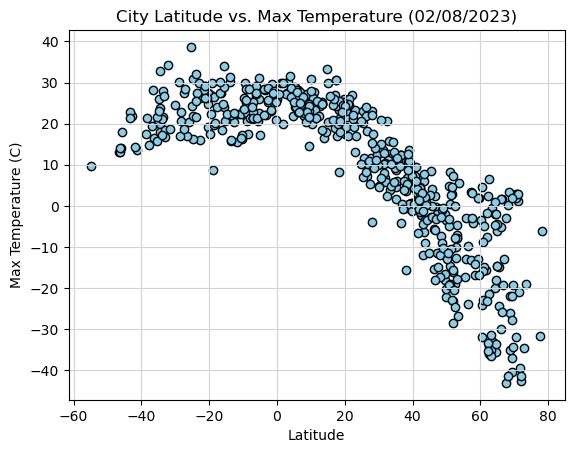

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (" + city_data_df['Date'][0][0:10] + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Incorporate the other graph properties
plt.grid (axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

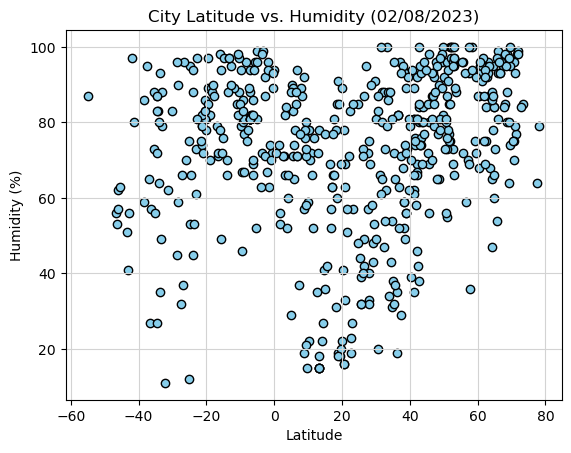

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (" + city_data_df['Date'][0][0:10] + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
plt.grid (axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

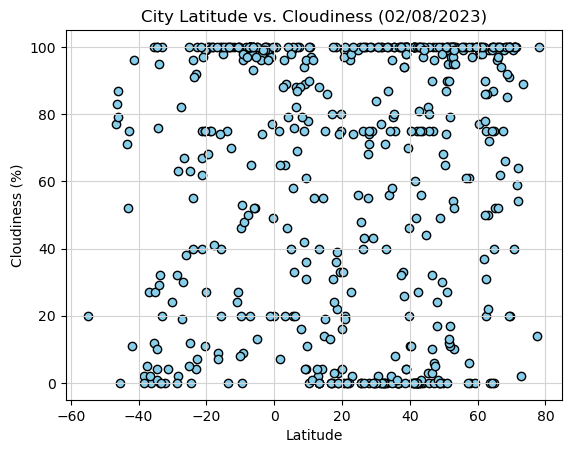

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (" + city_data_df['Date'][0][0:10] + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
plt.grid (axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

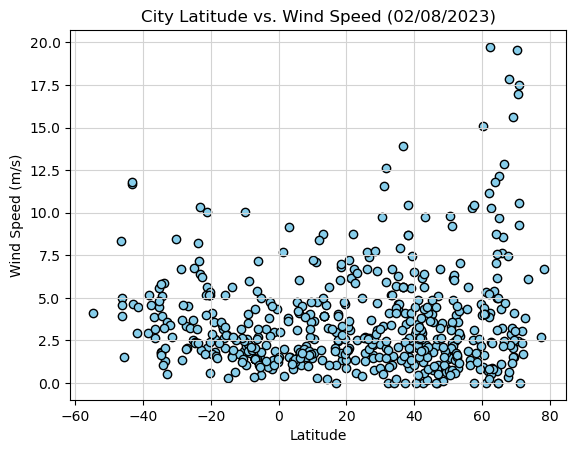

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (" + city_data_df['Date'][0][0:10] + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
plt.grid (axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def pltLinRegress(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
        
    fig1, ax1 = plt.subplots(figsize=(6,3.5))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.tight_layout()
    
    print(f"The r-value is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-31.94,96,100,2.44,RU,02/08/2023 22:42:43
1,verkhoyansk,67.5447,133.3850,-43.10,95,75,0.33,RU,02/08/2023 22:46:23
2,albany,42.6001,-73.9662,0.15,80,81,1.23,US,02/08/2023 22:41:57
5,tiksi,71.6872,128.8694,-39.37,98,59,2.35,RU,02/08/2023 22:43:01
7,yellowknife,62.4560,-114.3525,-21.36,84,75,4.12,CA,02/08/2023 22:42:14


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cidreira,-30.1811,-50.2056,24.49,83,24,8.46,BR,02/08/2023 22:40:27
4,vaini,-21.2000,-175.2000,29.09,79,75,2.06,TO,02/08/2023 22:41:55
6,port alfred,-7.0349,29.7638,21.43,81,100,1.42,CD,02/08/2023 22:46:24
8,bluff,-46.6000,168.3333,13.22,56,77,8.33,NZ,02/08/2023 22:41:54
11,arraial do cabo,-22.8362,-46.6460,16.13,97,7,1.95,BR,02/08/2023 22:46:25


###  Max Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7478261384839981


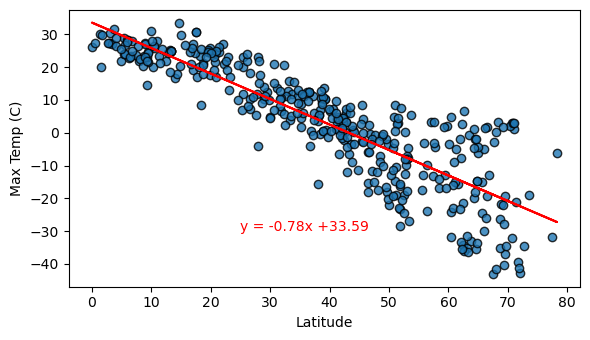

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
pltLinRegress(x_values, y_values, "Latitude", "Max Temp (C)", "Northern", (25, -30))
plt.show()

The r-value is: 0.10815041718558399


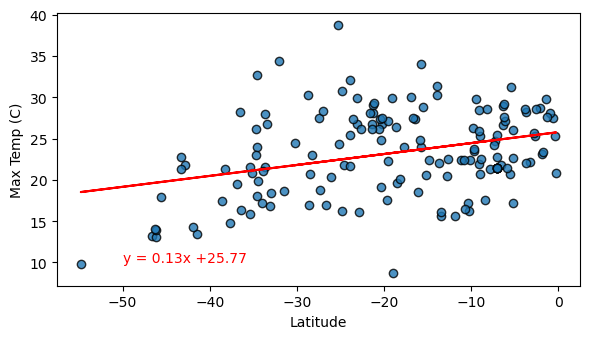

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
pltLinRegress(x_values, y_values, "Latitude", "Max Temp (C)", "Southern", (-50, 10))
plt.show()

**Discussion about the linear relationship:** The correlation between latitude and max temperature is highly notorious for northern and southern hemispheres. The farther the city is from the equator, the max temperature goes down linearly.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2060109926134811


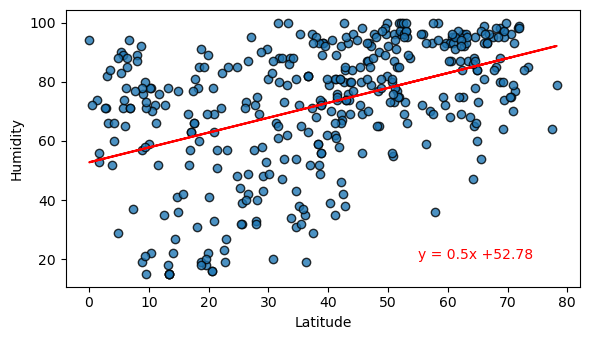

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
pltLinRegress(x_values, y_values, "Latitude", "Humidity", "Northern",(55,20))
plt.show()

The r-value is: 0.13243229062386966


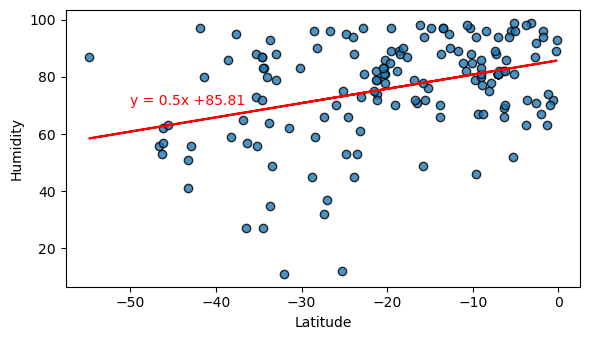

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
pltLinRegress(x_values, y_values, "Latitude", "Humidity", "Southern",(-50, 70))

**Discussion about the linear relationship:** There is no clear correlation between humidity & latitude for either hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.040907830601902666


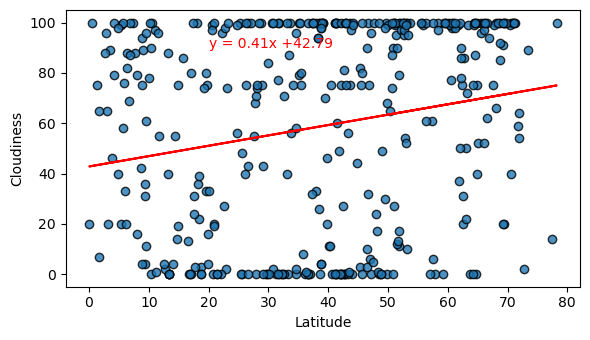

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
pltLinRegress(x_values, y_values, "Latitude", "Cloudiness", "Northern", (20, 90))

The r-value is: 0.17414596298073323


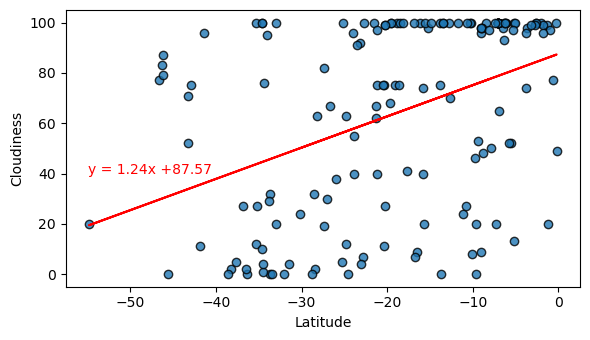

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
pltLinRegress(x_values, y_values, "Latitude", "Cloudiness", "Southern",(-55, 40))

**Discussion about the linear relationship:** There is no clear correlation between cloudiness & latitude for either hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.026026988579110025


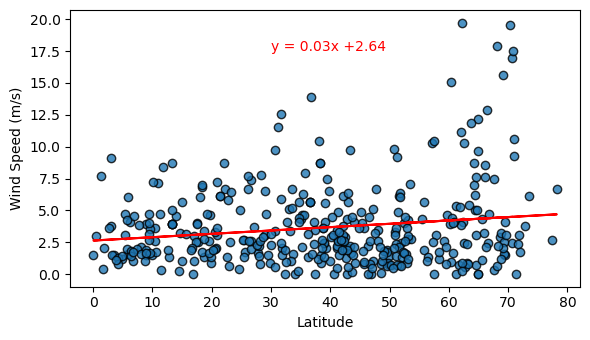

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
pltLinRegress(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Northern",(30, 17.5))

The r-value is: 0.13739114751896753


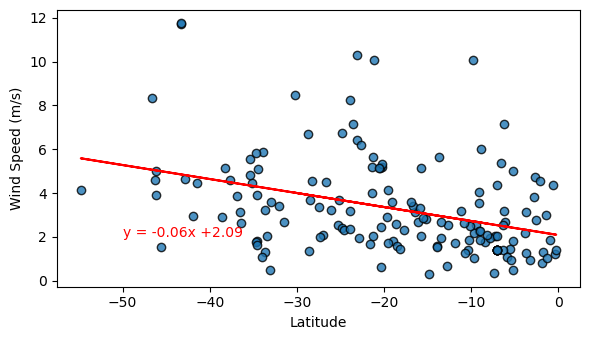

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
pltLinRegress(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Southern",(-50, 2))

**Discussion about the linear relationship:** There is no clear correlation between wind speed & latitude for either hemisphere